# Weather Australia

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

In [3]:
weather = pd.read_csv("WheterAU/weatherAUS.csv")
weather.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

<AxesSubplot:title={'center':'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

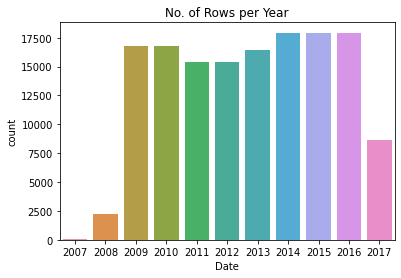

In [4]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather.Date).dt.year)

## Relationship between Sunshine and Evaporation

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

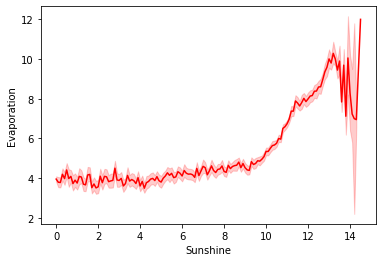

In [5]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',color='red')

## Relationship between Sunshine and Rainfall
#### When sunshine increases, rainfall decreases

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

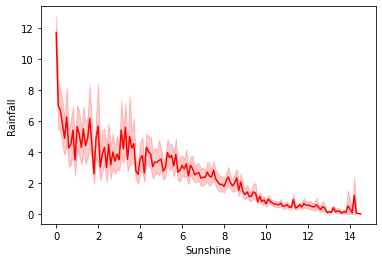

In [6]:
sns.lineplot(data=weather,x='Sunshine',y='Rainfall',color='red')

<AxesSubplot:>

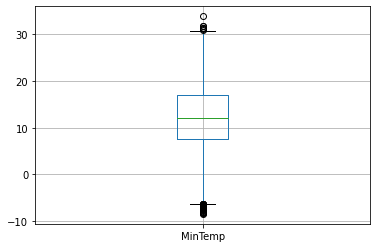

In [7]:
weather[['MinTemp']].boxplot()

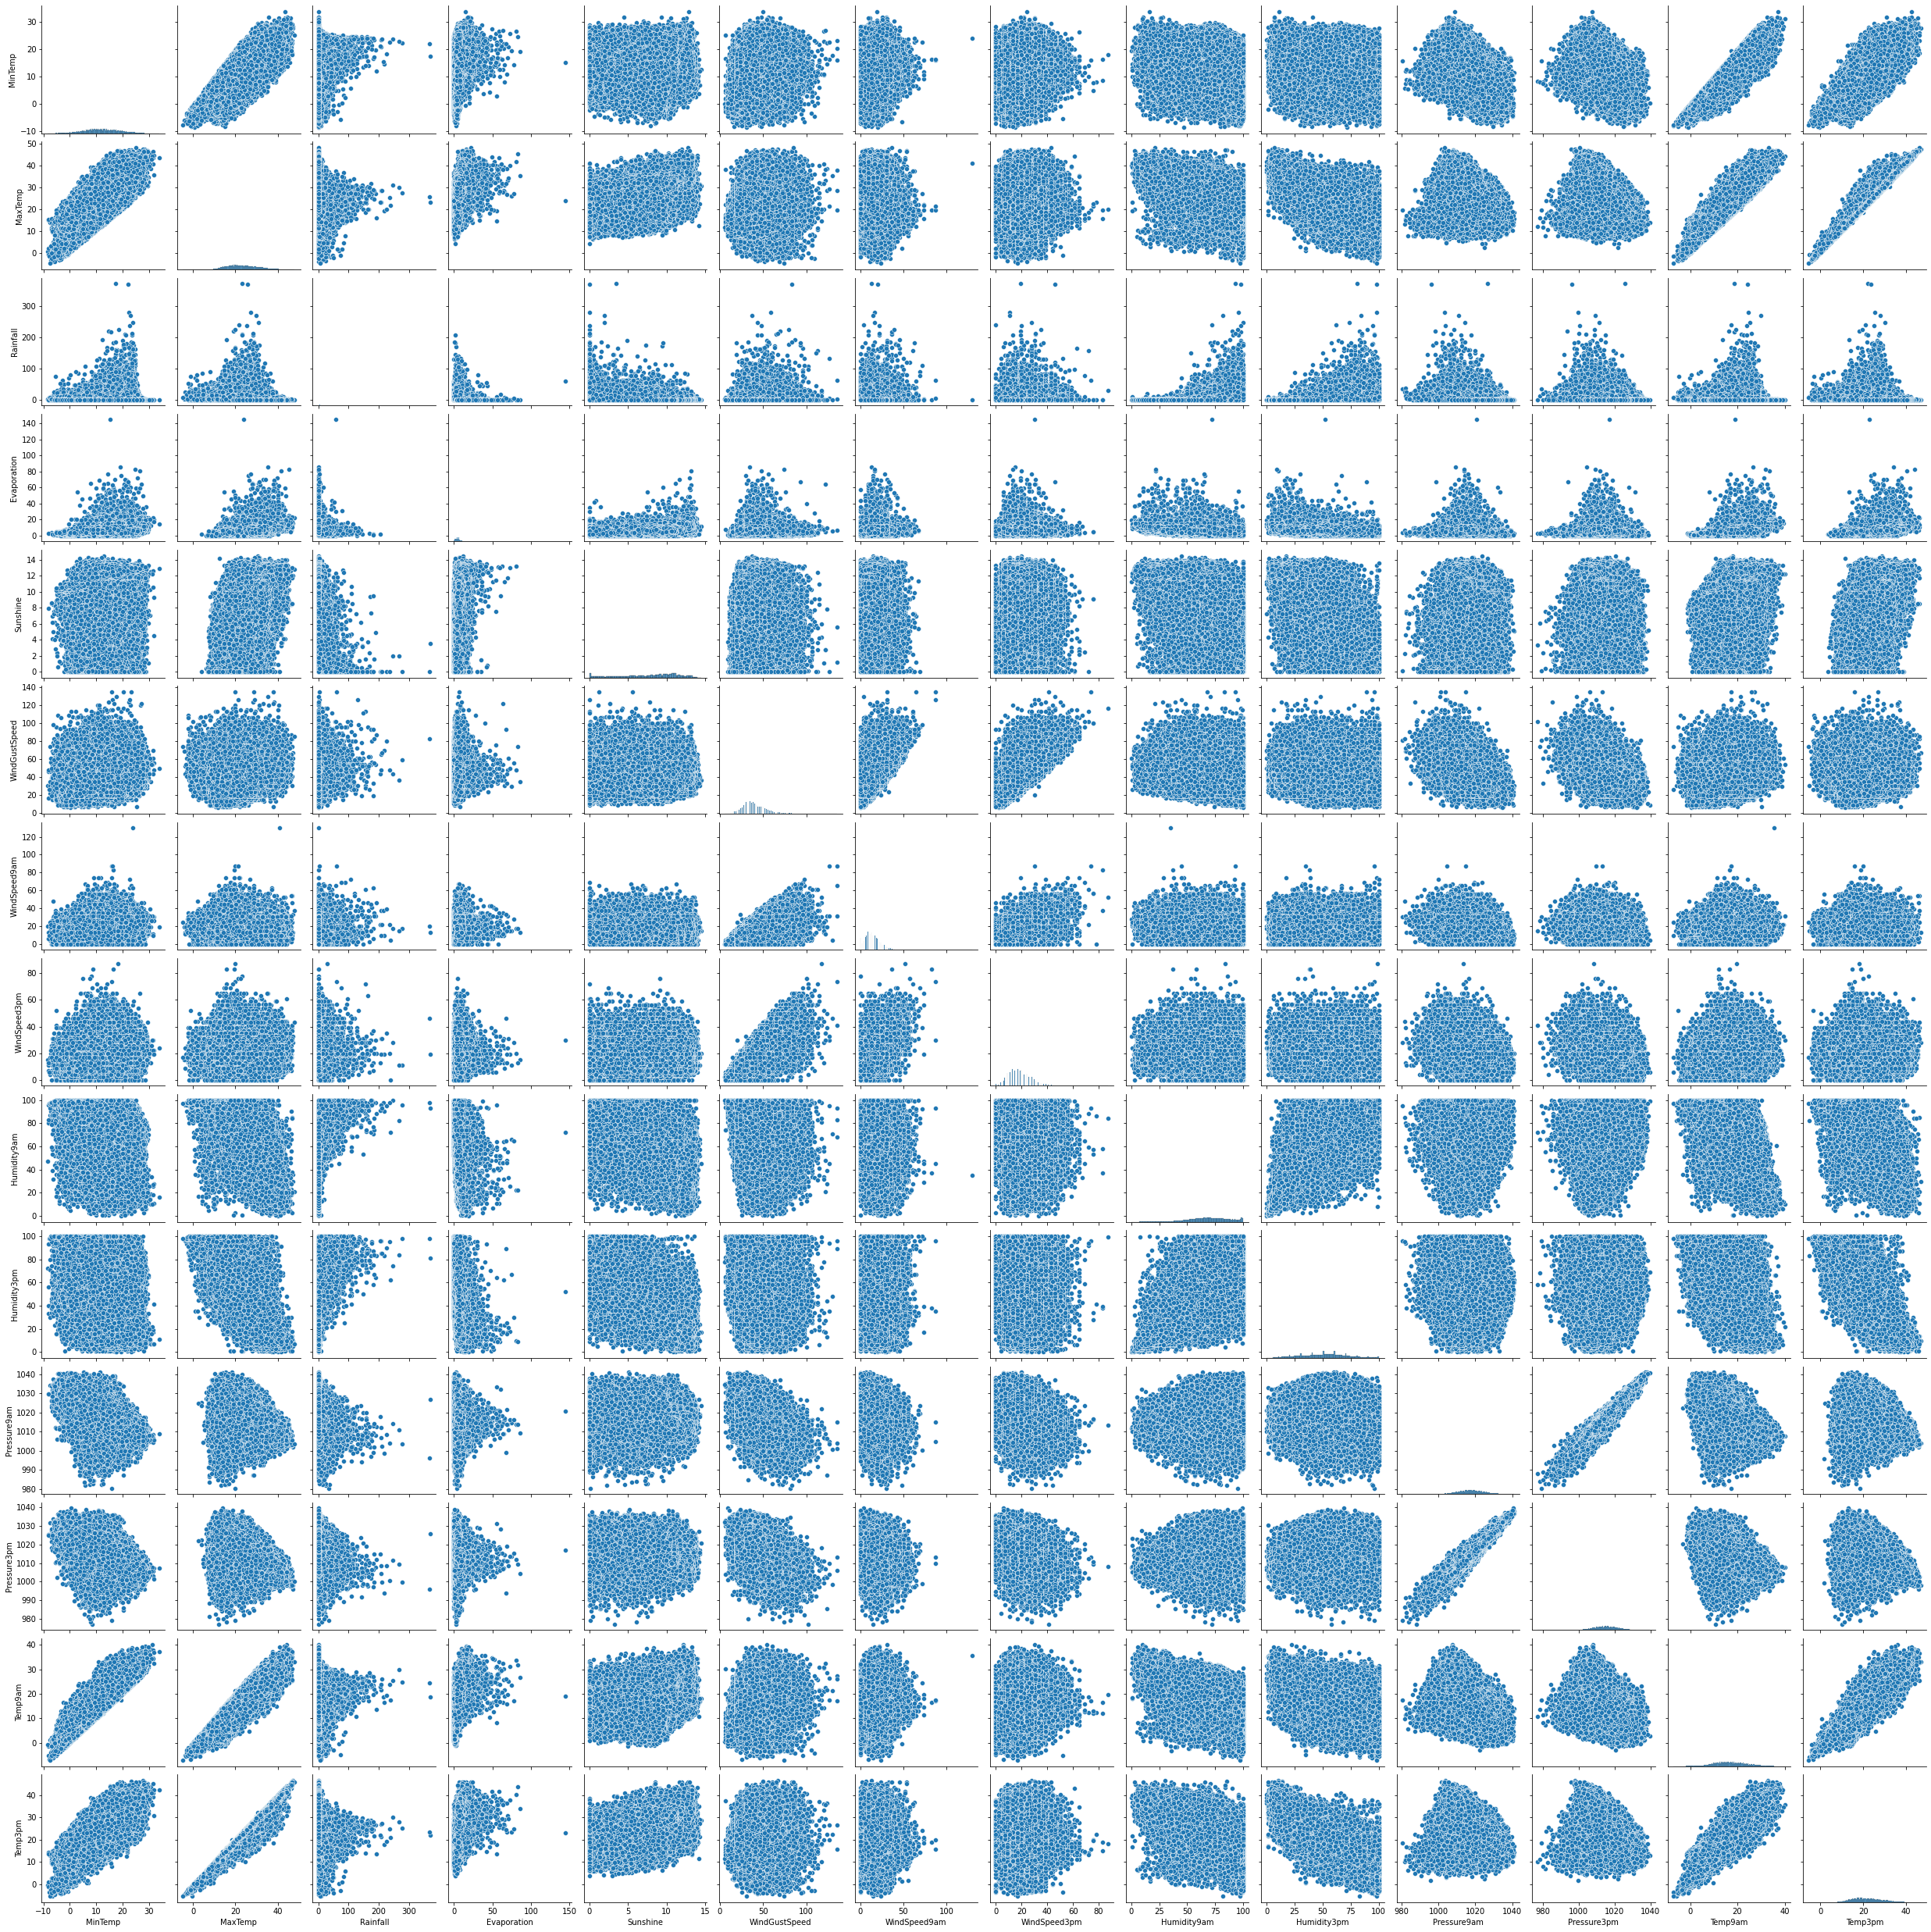

In [8]:
df_copy = weather
drop = df_copy.drop(columns=['Date','Location','WindGustDir','WindDir9am', 'WindDir3pm', 'Cloud9am','Cloud3pm'])
sns.pairplot(drop)

## Relationship between Sunshine and MinTemp & MaxTemp

<AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>

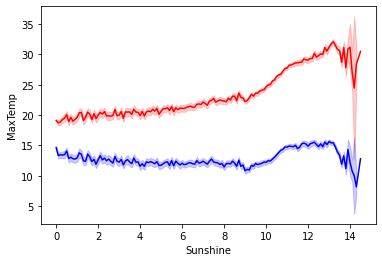

In [9]:
sns.lineplot(data=weather,x='Sunshine',y='MaxTemp',color='red')
sns.lineplot(data=weather,x='Sunshine',y='MinTemp',color='blue')

## Relationship between WindGustSpeed and Rainfall
### There is a not clear relationship between WindGustSpeed and Rainfall

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

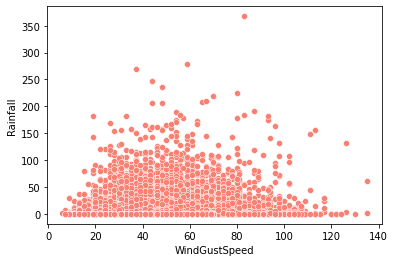

In [10]:
sns.scatterplot(data=weather,x='WindGustSpeed',y='Rainfall',color='salmon')

## Relationship between Sunshine and WindGustSpeed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Sunshine'>

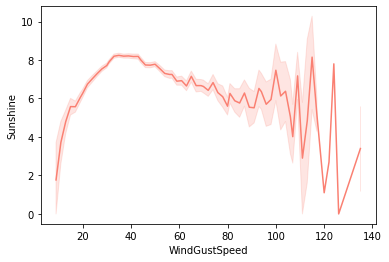

In [11]:
sns.lineplot(data=weather,x='WindGustSpeed',y='Sunshine',color='salmon')

## TOP 20 Country with max rainfall

C:\Users\Utente\AppData\Local\Temp\ipykernel_14932\191866656.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df=weather.groupby(by='Location').max().sort_values(by='Rainfall',ascending=False)[0:20]


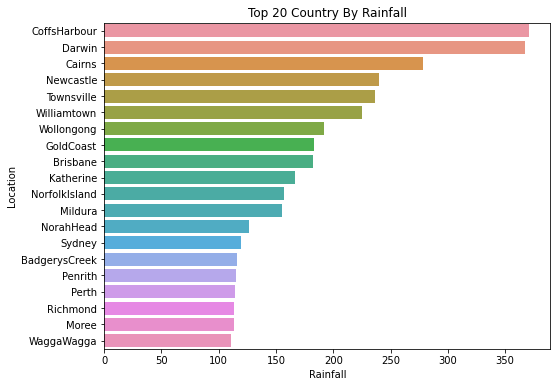

In [12]:
df=weather.groupby(by='Location').max().sort_values(by='Rainfall',ascending=False)[0:20]
plt.figure(figsize=(8,6))
sns.barplot(data=df,y=df.index,x='Rainfall')
plt.title("Top 20 Country By Rainfall")
plt.show()

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

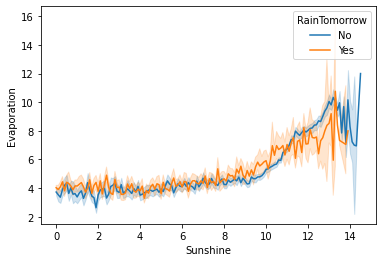

In [13]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',hue='RainTomorrow')

## Total sum of rainfall per year

In [14]:
df=weather.groupby(by=pd.to_datetime(weather.Date).dt.year).max().sort_values(by='Rainfall')
fig = px.bar(df,y='Rainfall')
fig.show()


C:\Users\Utente\AppData\Local\Temp\ipykernel_14932\1848920830.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df=weather.groupby(by=pd.to_datetime(weather.Date).dt.year).max().sort_values(by='Rainfall')


## Correlation between datas

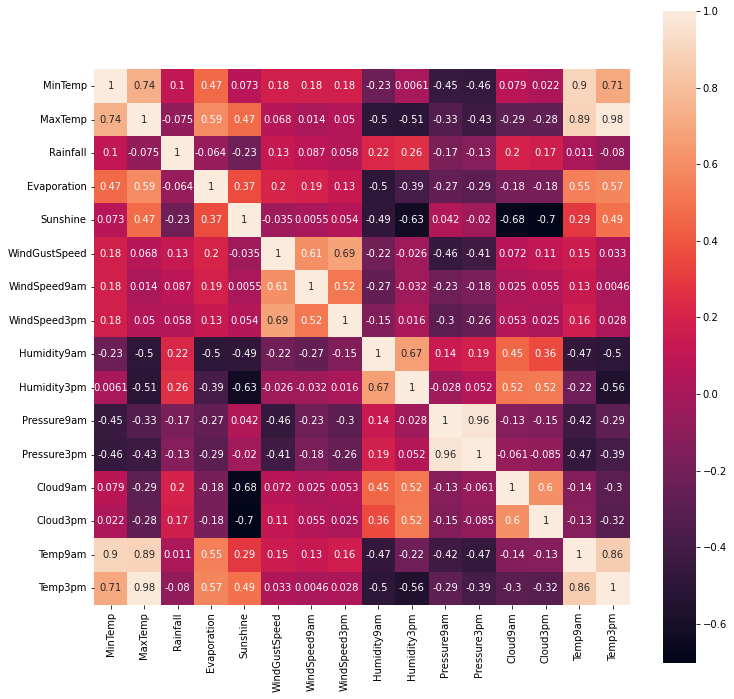

In [15]:
df2 = weather
check_data = df2.drop(columns=['Date','Location'])
plt.subplots(figsize=(12, 12))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()


# Powerlifting

In [16]:
powerlifting = pd.read_csv("Powerlifting/openpowerlifting.csv")
powerlifting.head()

MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
3       0       Dawn Bogart   F         Raw  42.0  Open Senior         58.51   
4       0      Destiny Dula   F         Raw  18.0   Teen 18-19         63.68   

  WeightClassKg  Squat4Kg  BestSquatKg  Bench4Kg  BestBenchKg  Deadlift4Kg  \
0            60       NaN        47.63       NaN        20.41          NaN   
1            60       NaN       142.88       NaN        95.25          NaN   
2            60       NaN       142.88       NaN        95.25          NaN   
3            60       NaN          NaN       NaN        95.25          NaN   
4          67.5       NaN          NaN       NaN        31.75          NaN   

   BestDeadliftKg  TotalKg Place   Wilks  
0           70.31   138.35     1  155.05  
1          163.29   401.42     1  456.38  
2          163.29   401.42     1  456.38  
3             NaN    95.25     1  108.29  
4           90.72   122.47     1  130.47

In [17]:
meets = pd.read_csv("Powerlifting/meets.csv")
meets.head()

MeetID        MeetPath Federation        Date MeetCountry MeetState  \
0       0  365strong/1601  365Strong  2016-10-29         USA        NC   
1       1  365strong/1602  365Strong  2016-11-19         USA        MO   
2       2  365strong/1603  365Strong  2016-07-09         USA        NC   
3       3  365strong/1604  365Strong  2016-06-11         USA        SC   
4       4  365strong/1605  365Strong  2016-04-10         USA        SC   

    MeetTown                                           MeetName  
0  Charlotte  2016 Junior & Senior National Powerlifting Cha...  
1      Ozark                  Thanksgiving Powerlifting Classic  
2  Charlotte                             Charlotte Europa Games  
3  Rock Hill                   Carolina Cup Push Pull Challenge  
4  Rock Hill                              Eastern USA Challenge

In [18]:
openpowerlifting = pd.merge(left=powerlifting, right=meets, how='inner', on='MeetID')
openpowerlifting.head()

MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
3       0       Dawn Bogart   F         Raw  42.0  Open Senior         58.51   
4       0      Destiny Dula   F         Raw  18.0   Teen 18-19         63.68   

  WeightClassKg  Squat4Kg  BestSquatKg  ...  TotalKg  Place   Wilks  \
0            60       NaN        47.63  ...   138.35      1  155.05   
1            60       NaN       142.88  ...   401.42      1  456.38   
2            60       NaN       142.88  ...   401.42      1  456.38   
3            60       NaN          NaN  ...    95.25      1  108.29   
4          67.5       NaN          NaN  ...   122.47      1  130.47   

         MeetPath  Federation        Date  MeetCountry MeetState   MeetTown  \
0  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
1  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
2  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
3  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
4  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   

                                            MeetName  
0  2016 Junior & Senior National Powerlifting Cha...  
1  2016 Junior & Senior National Powerlifting Cha...  
2  2016 Junior & Senior National Powerlifting Cha...  
3  2016 Junior & Senior National Powerlifting Cha...  
4  2016 Junior & Senior National Powerlifting Cha...  

[5 rows x 24 columns]